# Introduction and Code Accessibility
The paper “Contrastive Learning is Spectral Clustering on Similarity Graph” itself contains an information on where to find the code for reproducing the results. It can be found under the link: https://github.com/yifanzhang-pro/Kernel-InfoNCE. 
The GitHub repository contains a readme file that provides information on how to run the code. Personally, I needed to set it up properly and the version I’ve used can be found under the link: https://github.com/maxharnot/Kernel-InfoNCE-OK .

My goal of the paper is to reproduce the Table 1 from page 9 of the research paper, where I am focusing on the datasets CIFAR-10 and CIFAR-100.

# Challenges
During the running of the code I’ve faced several issues that all in all returned me a very low accuracy in the final results. First of all, we know that the code was ran on a Linux system, using an A 100 GPU. Therefore, my first idea was to run it on a Linux implemented in the google colab environment. Unfortunately, it turned out that the versions of the packages were not compatible with each other. I've tried the same on a Windows and a Mac system but faced the same issues, as the packages were directed towards a Linux environment. Thus, in order to set up the environment, I had to solve a lot of bugs within the versions of the packages. As we can see, the environment of the code was set up some time ago and due to updates and lack of better documentation I could only assume what the proper setup could be. This fact might as well have an influence on the reproducibility and the results, which I will present later.

As a result of this, my major concern during this project was running the random_search.py algorithm, which finally didn’t work out due to an error. Even though I have installed the proper libraries, I have faced an error in the ray.tune package. I wasn’t able to run the random_search algorithm and thus obtain the proper hyperparameters. Unfortunately, even though I’ve tried my best in extracting the used hyperparameters from the paper, the information provided was not explicit enough to obtain reasonable results. 

The error message I've faced at this step was the following:

ValueError: Trial returned a result which did not include the specified metric(s) `online_val_acc` that `tune.TuneConfig()` expects. Make sure your calls to `tune.report()` include the metric, or set the TUNE_DISABLE_STRICT_METRIC_CHECKING environment variable to 1. Result: {'trial_id': 'a0674_00000', 'date': '2024-06-25_09-59-39', 'timestamp': 1719309579, 'pid': 4381, 'hostname': '0ff6c0759426', 'node_ip': '172.28.0.12', 'done': True, 'config/learning_rate': 0.3983154936089757, 'config/temperature': 0.05078108049027914, 'config/gamma': 0.5, 'config/projection_mu': 1.0, 'config/gamma_lambd': 0.01043102867215806, 'config/acos_order': 0}

I've tried to follow the instructions, nevertheless setting the TUNE_DISABLE_STRICT_METRIC_CHECKING flag to 1 only hid the problem, it didn't resolve it, as it was expected. I couldn't fetch thus the optimal hyperparameters, I could only rely on the information provided in the paper.

In the further steps, the training algorithm in the simclr_module.py file ran without any major issues but unfortunately the results were horribly low. I've ran the finetuning afterwards as well, nevertheless due to problems with the algorithm (some results after the finetuning contained the proper metrics, others didn't) and their very little divergence from the results I have obtained in the simclr_module I have based my reproduction results on the results from the simclr_module.py file.

# Experiment

In the experiment I start with installing the proper packages and libraries.

My commands I used were:

In [143]:
! pip install -r requirements_versions.txt

Or sometimes, when I obtained problems with some versions of libraries that wouldn't install, I ran this, more general command for installing the libraries:

In [ ]:
! pip install -r requirements.txt

The first step should be according to the readme file the execution of the random_search.py algorithm. Nevertheless, after entering the command line:
! python random_search.py --dataset cifar10 --optimizer lars --max_epochs 50
the results are like described in the challenges section, the algorithm doesn't calculate the results, the trials don't deliver any results and thus I needed to move to the next step. Normally I should receive from this algorithm metrics like: 'Best trial config' and 'Best trial final validation accuracy', in my case the setup didn't succeed so I had to look for some hyperparameters in the paper and in the code in order to proceed with the following step, skipping the random_search.py file.

In the followin step I have used the hyperparameters that I could extract from the paper. At each point, where there was no information, I have assumed that the default values, that were implemented in the code, were the proper ones. I ran the code on Google Colab in order to use a GPU device.

In order to reproduce the table I had to compare 5 different methods:
- SimCLR
- Laplacian Kernel
- Exponential Kernel
- Simple Sum Kernel
- Concatenation Sum Kernel

I have prepared myself the exact commands to be executed for all the 5 cases. The only thing that I have changed then was the number of epochs: 50 and 200, and the dataset, varying between CIFAR-10 and CIFAR-100

Here are the 5 commands, that I've used to run the 5 different methods (they are also mentioned in the script_train.sh file that I've created)

- ! python simclr_module.py --batch_size=256 --dataset="cifar10" --fast_dev_run=0 --gpus=1 --gamma=1 --jitter_strength=0.5 --loss_type="spectral" --max_epochs=50 --optimizer="lars" --online_ft (SimCLR)
- ! python simclr_module.py --batch_size=256 --dataset="cifar10" --fast_dev_run=0 --gpus=1 --gamma=1 --jitter_strength=0.5 --loss_type="origin" --max_epochs=50 --optimizer="lars" --online_ft (Laplacian Kernel)
- ! python simclr_module.py --batch_size=256 --dataset="cifar10" --fast_dev_run=0 --gpus=1 --gamma=0.5 --jitter_strength=0.5 --loss_type="origin" --max_epochs=50 --optimizer="lars" --online_ft (Exponential Kernel)
- ! python simclr_module.py --batch_size=256 --dataset="cifar10" --fast_dev_run=0 --gpus=1 --gamma=1 --jitter_strength=0.5 --loss_type="sum" --max_epochs=50 --optimizer="lars" --online_ft (Simple Sum Kernel)
- ! python simclr_module.py --batch_size=256 --dataset="cifar10" --fast_dev_run=0 --gpus=1 --gamma=1 --jitter_strength=0.5 --loss_type="product" --max_epochs=50 --optimizer="lars" --online_ft (Concatenation Sum Kernel)


As an explicit example, this one below could be used to obtain the results for 50 epochs for the Laplacian Kernel, on the dataset CIFAR-10:

In [ ]:
! python simclr_module.py --batch_size=256 --dataset="cifar10" --fast_dev_run=0 --gpus=1 --gamma=1 --jitter_strength=0.5 --loss_type="origin" --max_epochs=50 --optimizer="lars" --online_ft

The results I obtained, I saved under the folders "results_50epochs" and "results_200epochs", which are provided in the project. Below I'm demonstrating the results of the train and validation accuracy for these results.

In [1]:
%load_ext autoreload
%autoreload 2

from visualisation_utils import plot_all_results

# Training 50 epochs

exponential_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


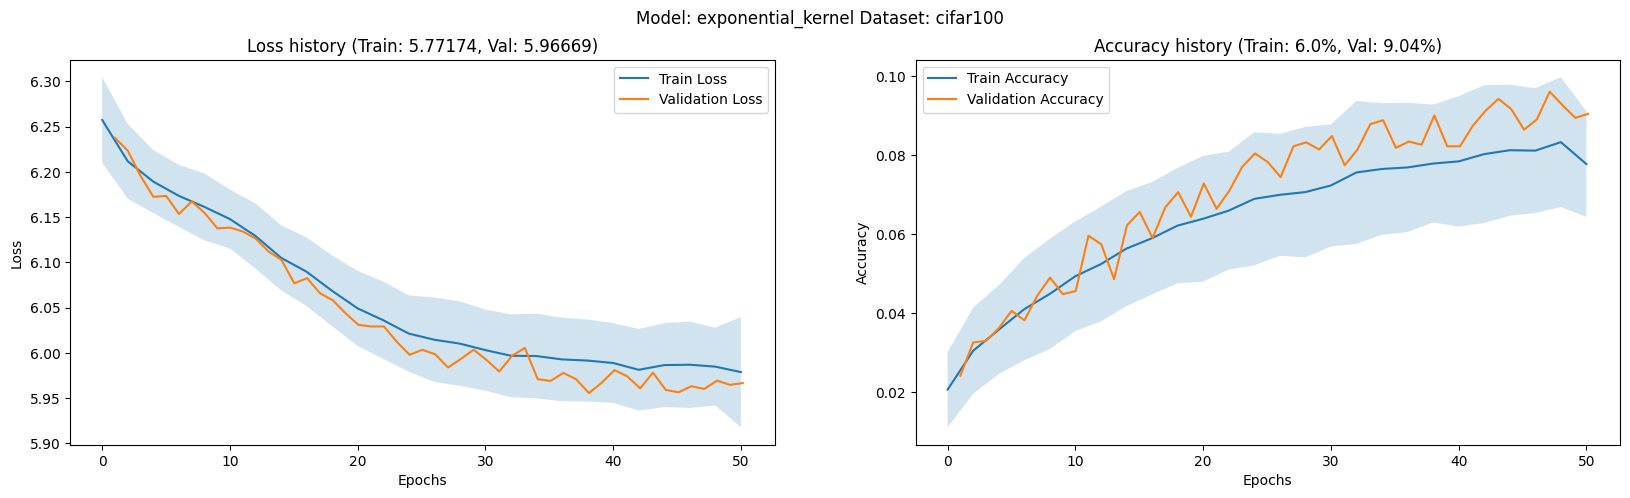

exponential_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


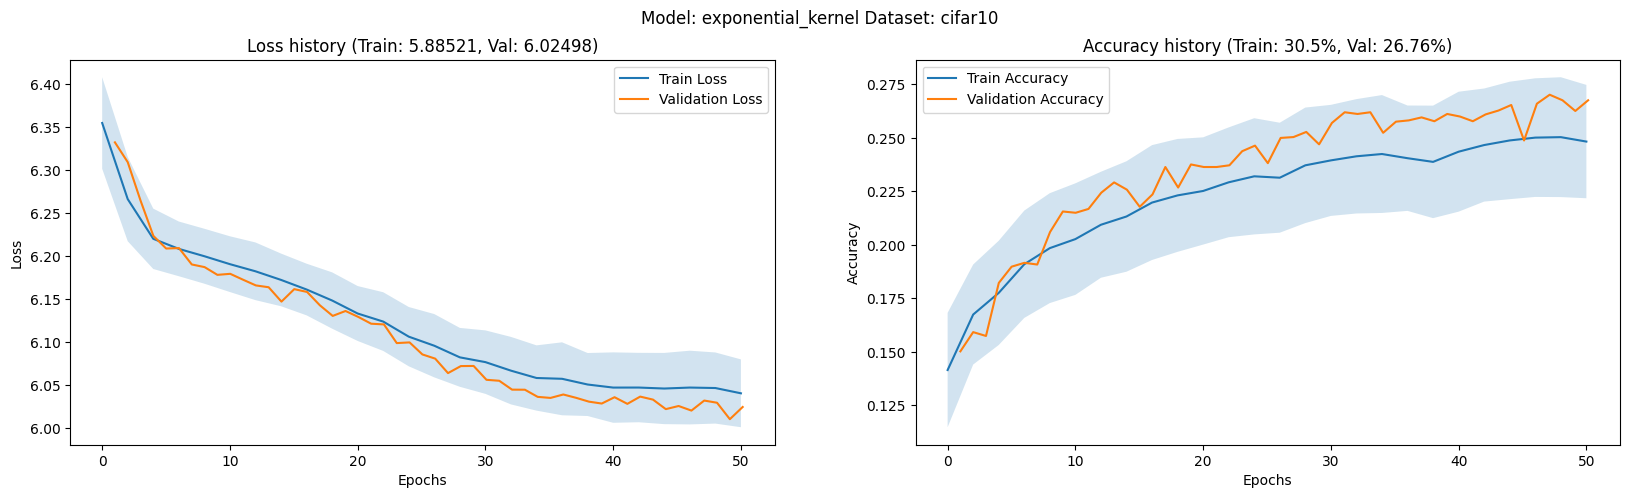

simple_sum_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


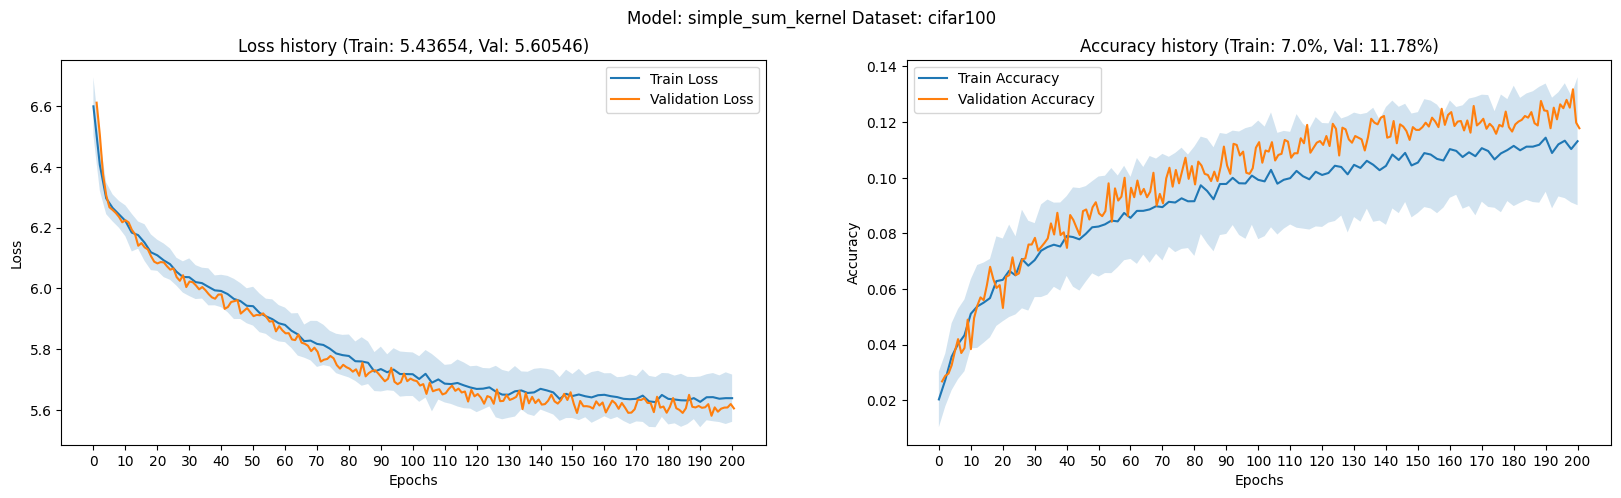

simple_sum_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


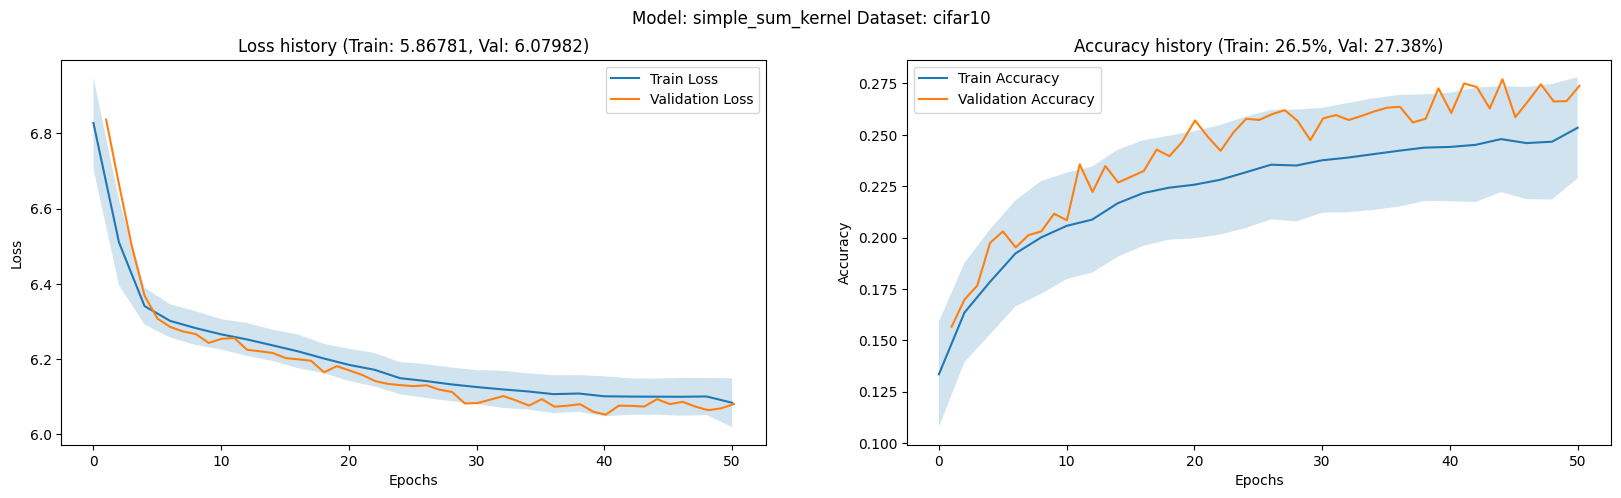

concatenation_sum_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


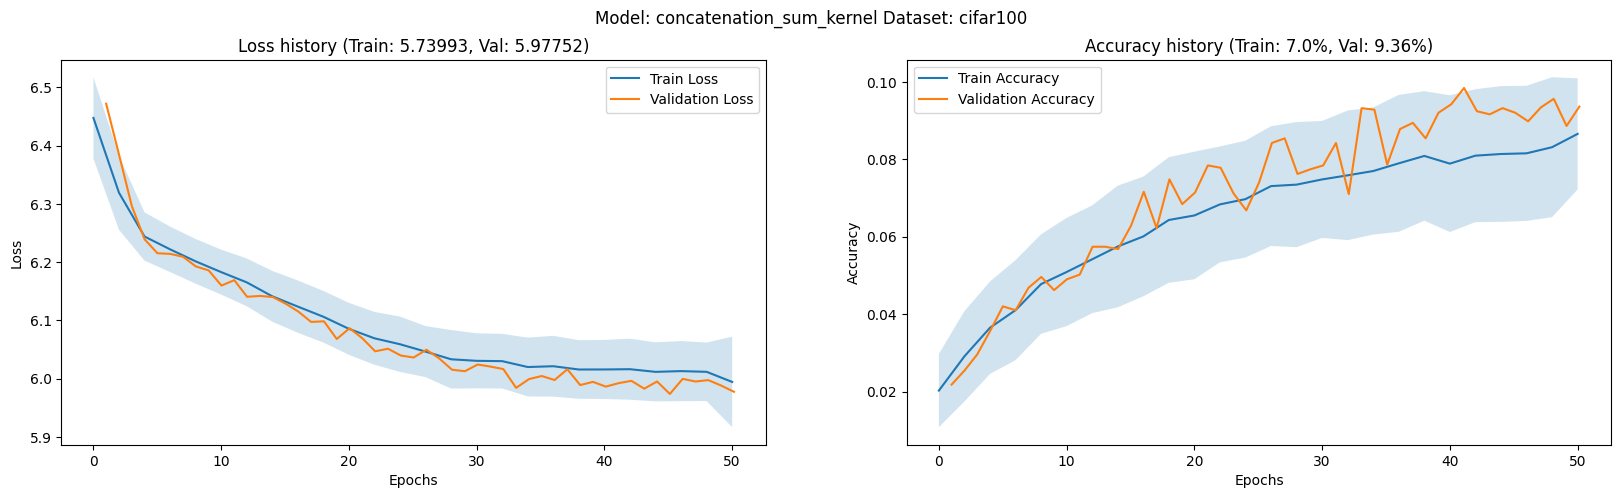

concatenation_sum_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


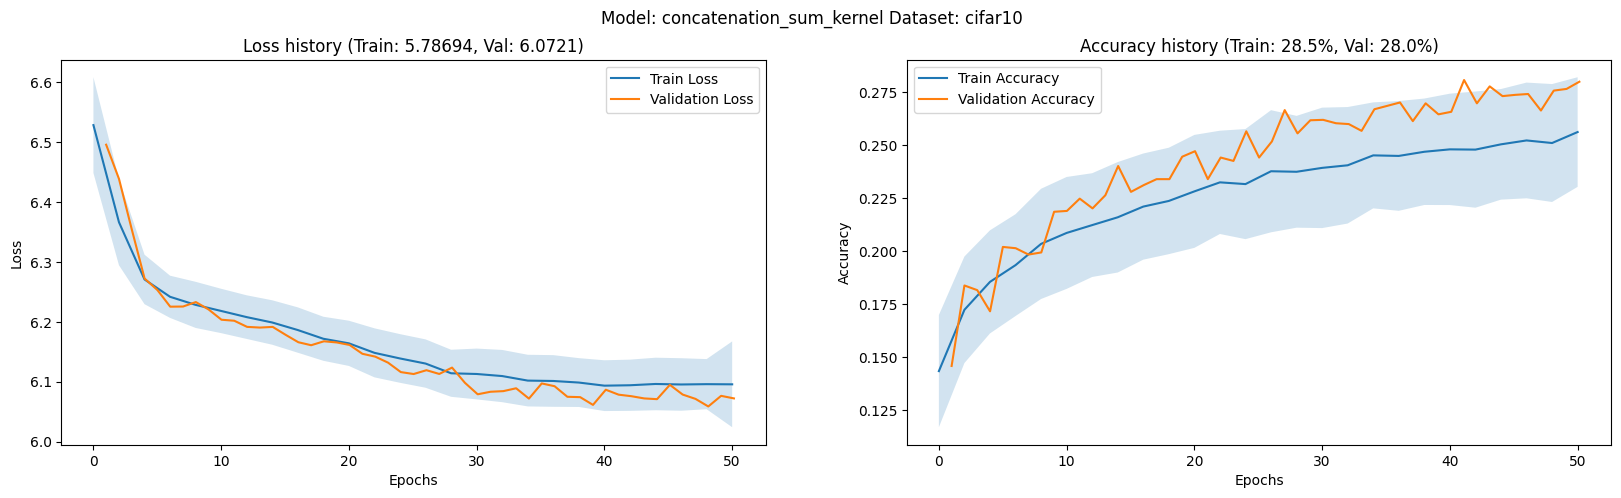

laplacian_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


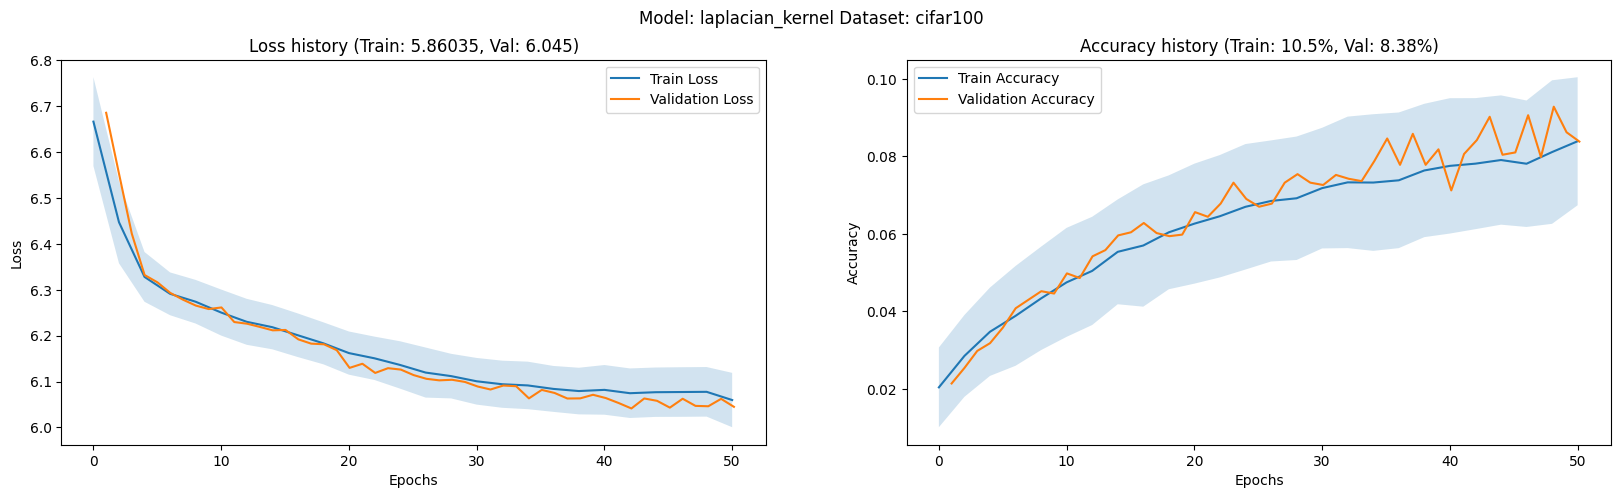

laplacian_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


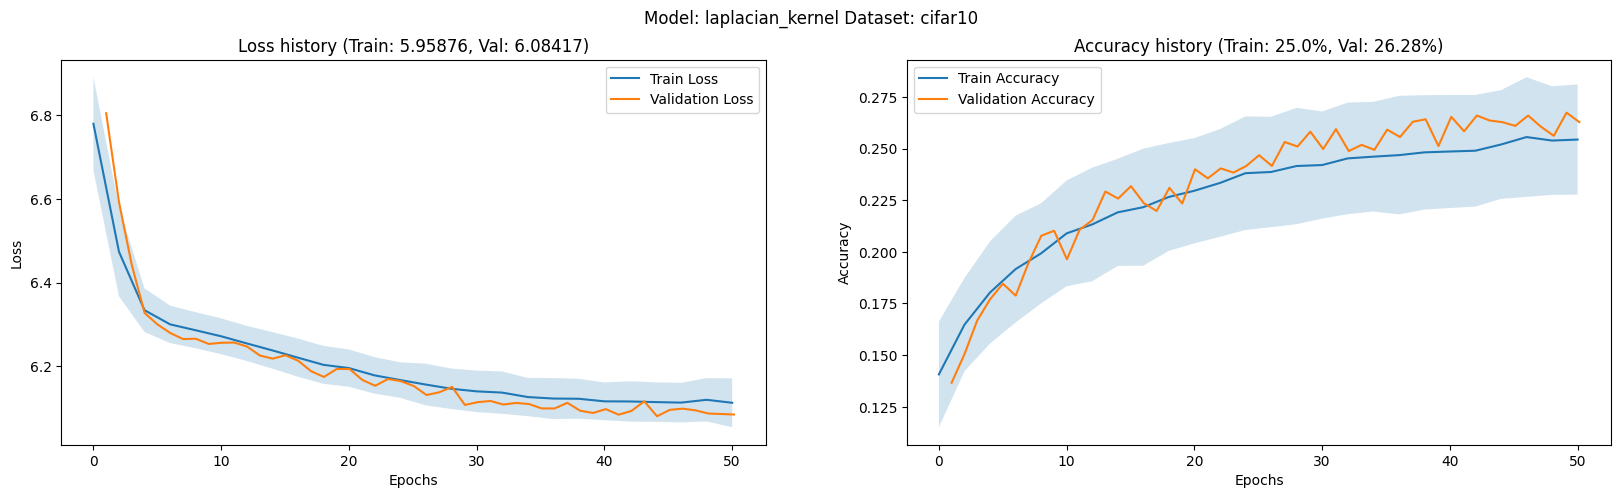

simclr_reproduction cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


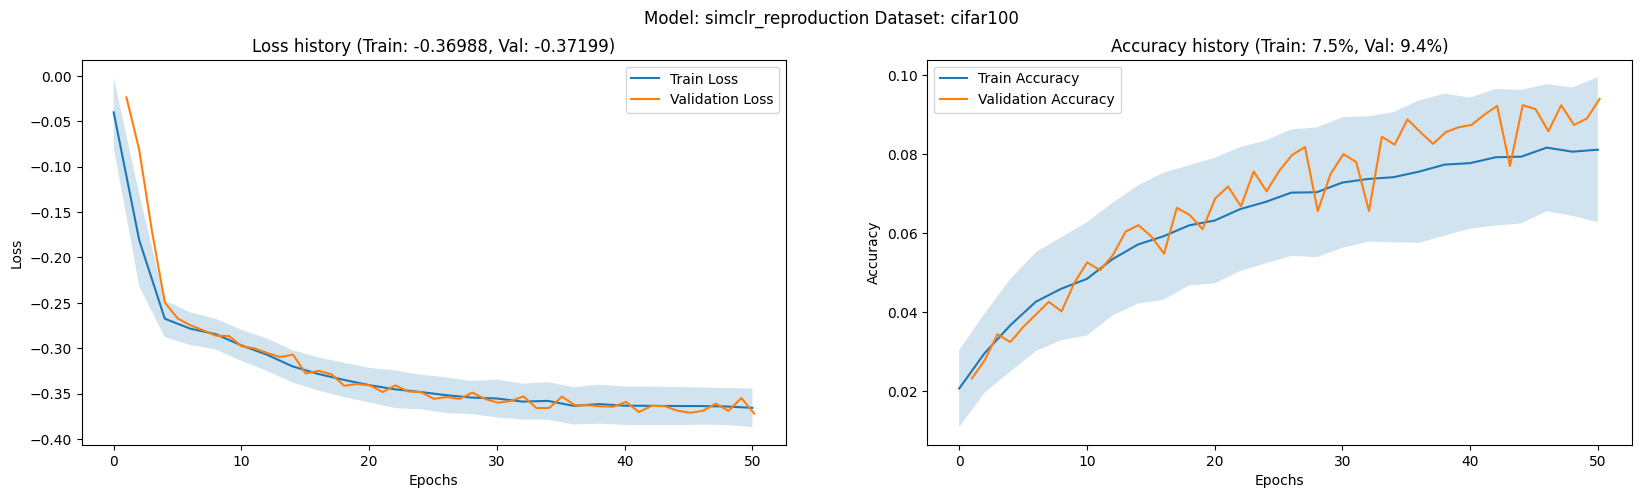

simclr_reproduction cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


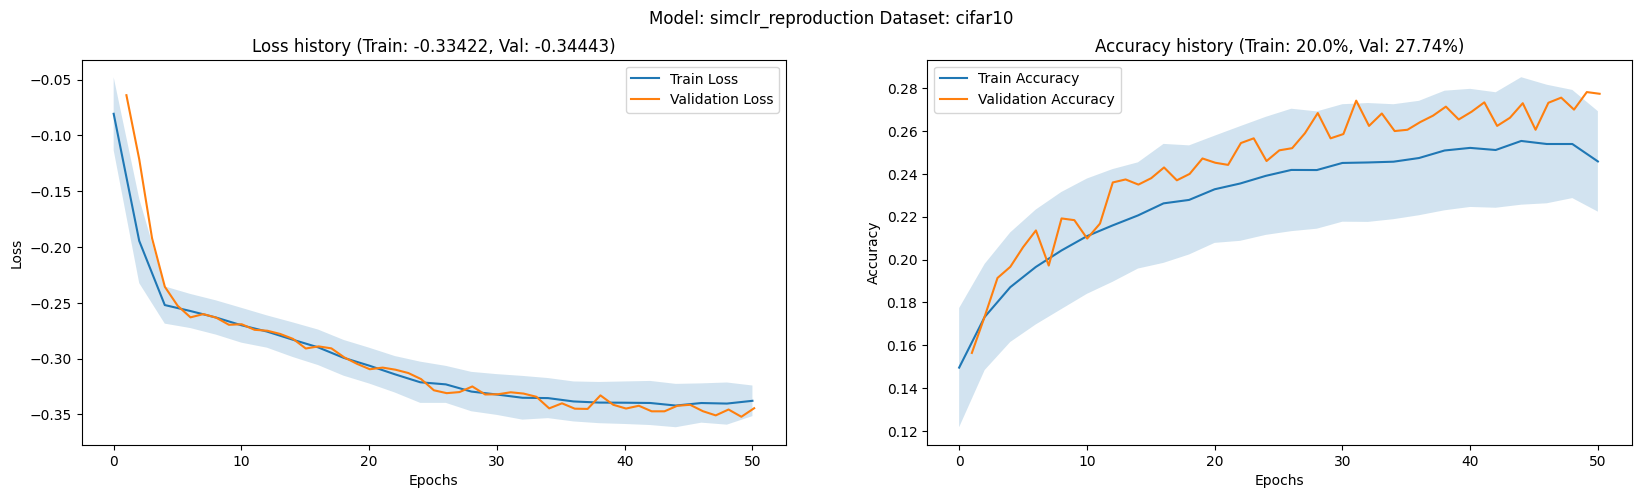

In [2]:
results = plot_all_results(results_path='results_50epochs', results=[])

# Training 200 epochs

exponential_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


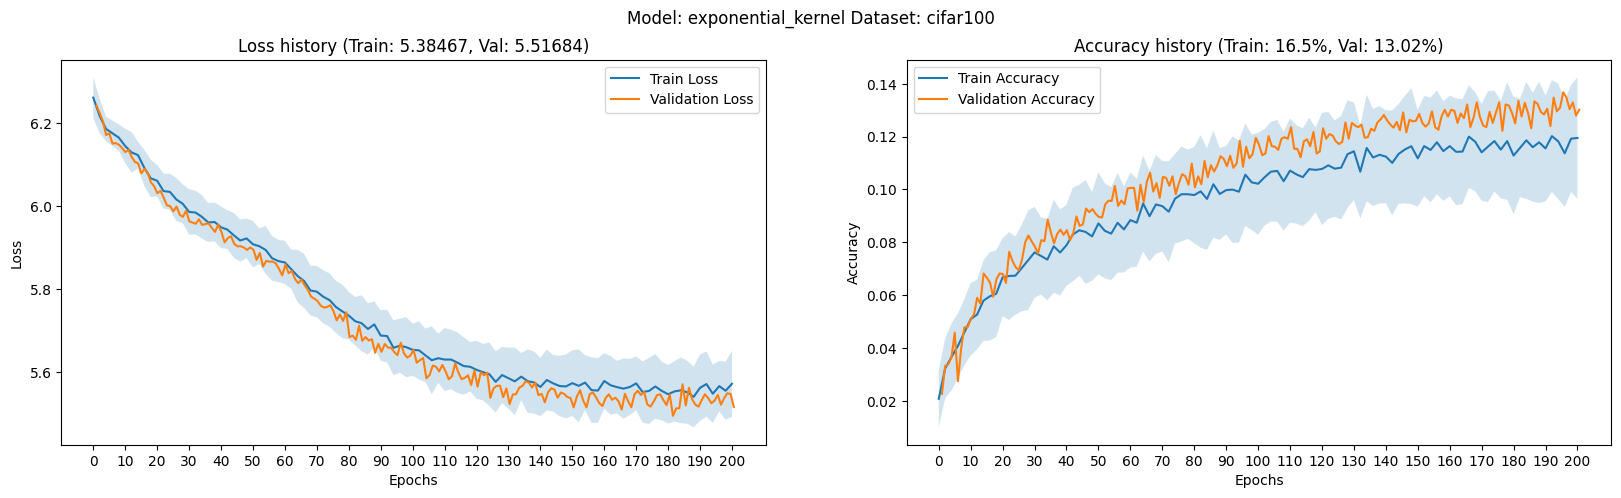

exponential_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


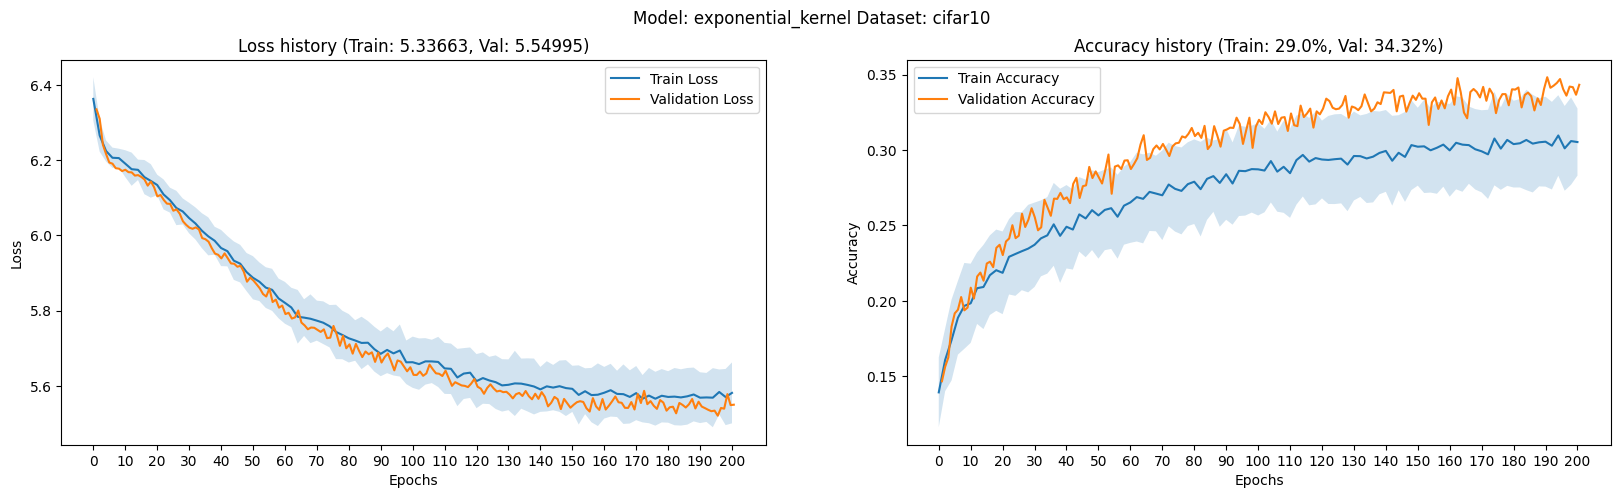

simple_sum_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


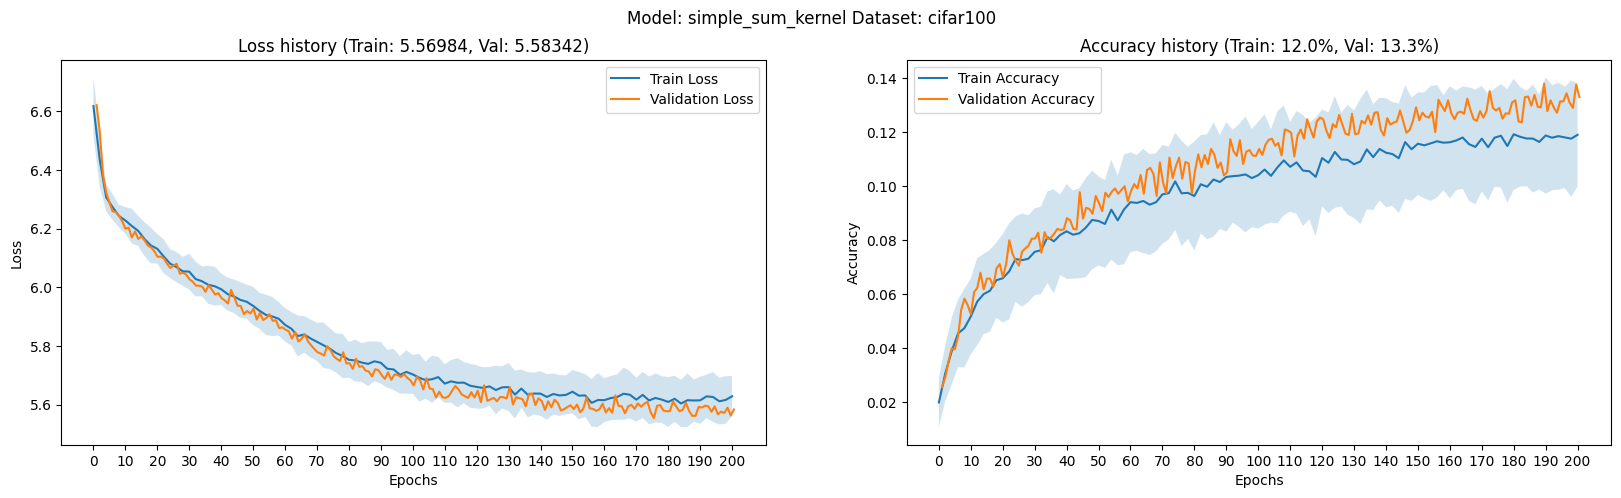

simple_sum_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


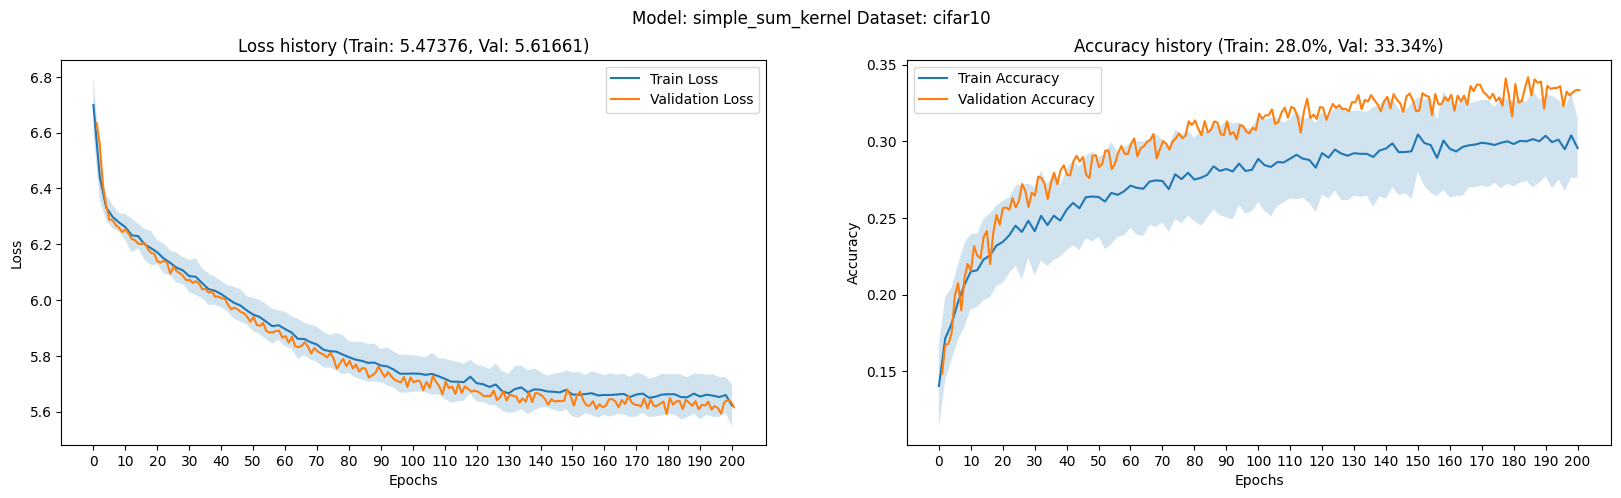

concatenation_sum_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


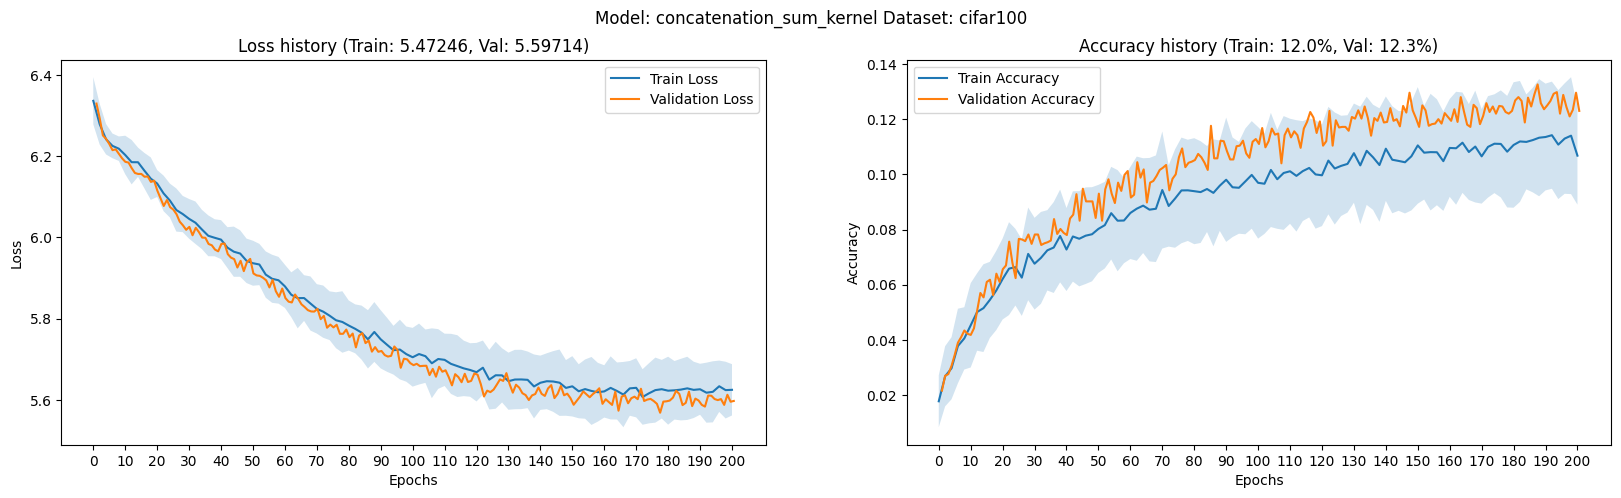

concatenation_sum_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


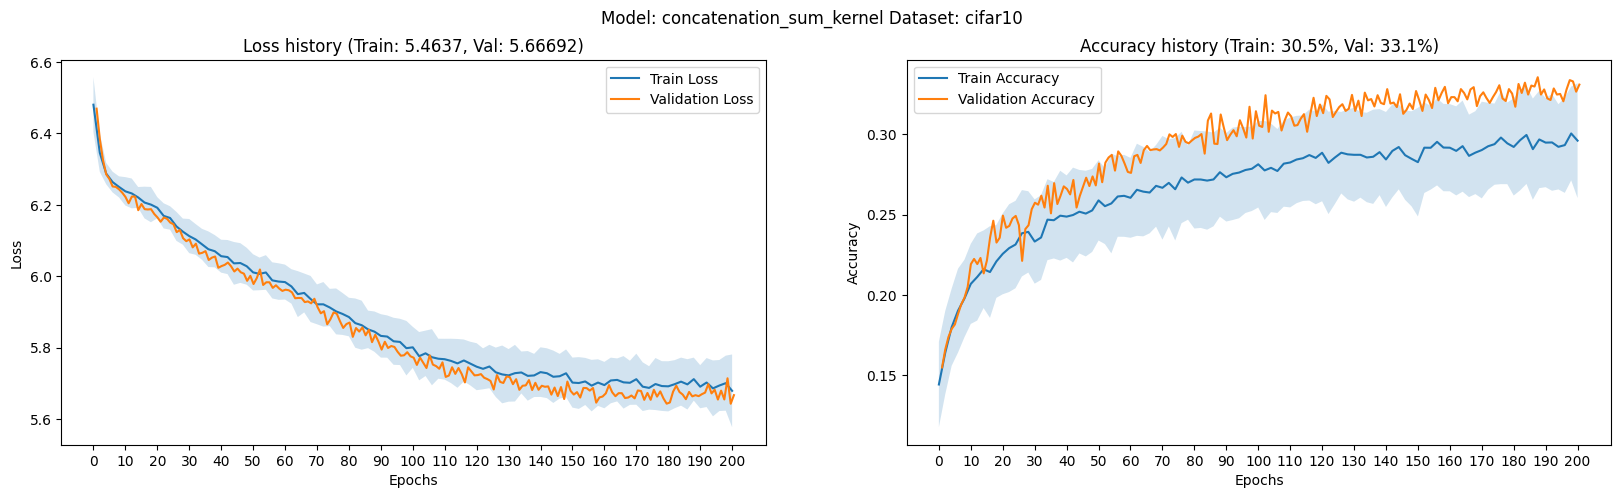

laplacian_kernel cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


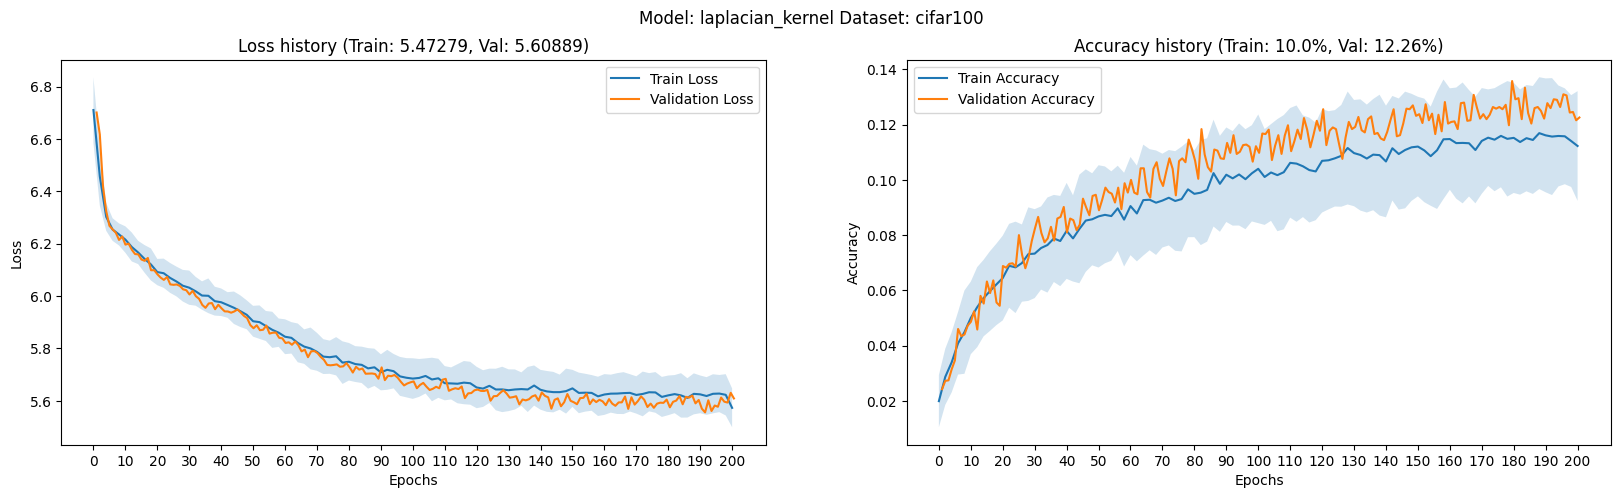

laplacian_kernel cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


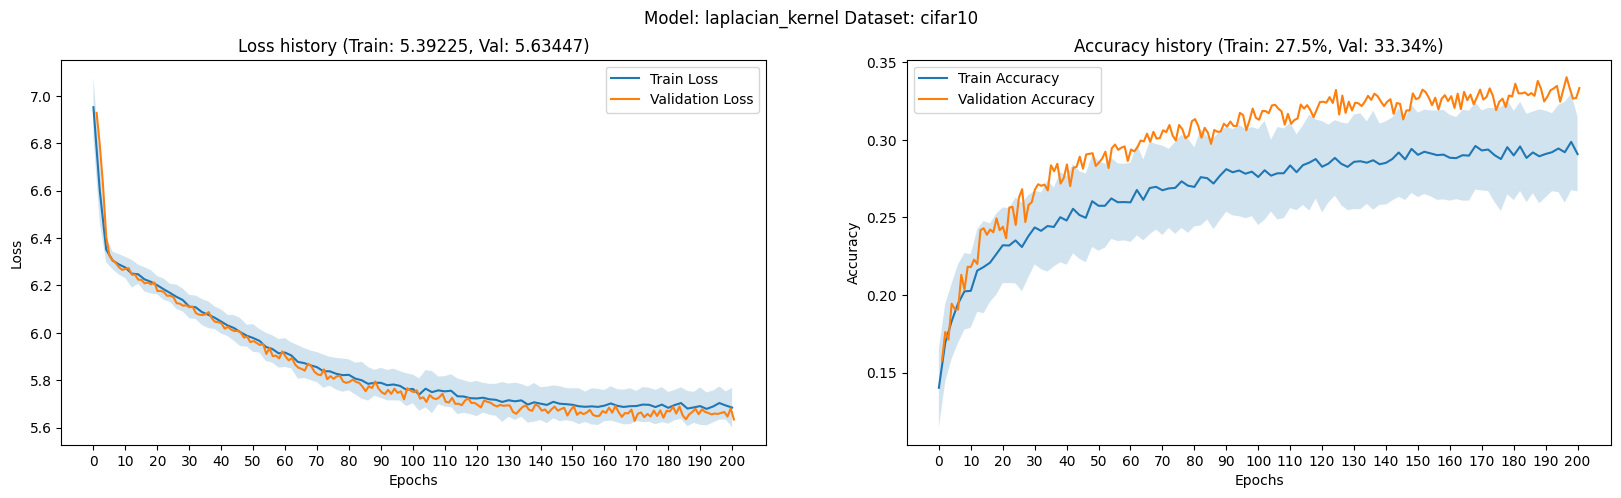

simclr_reproduction cifar100 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


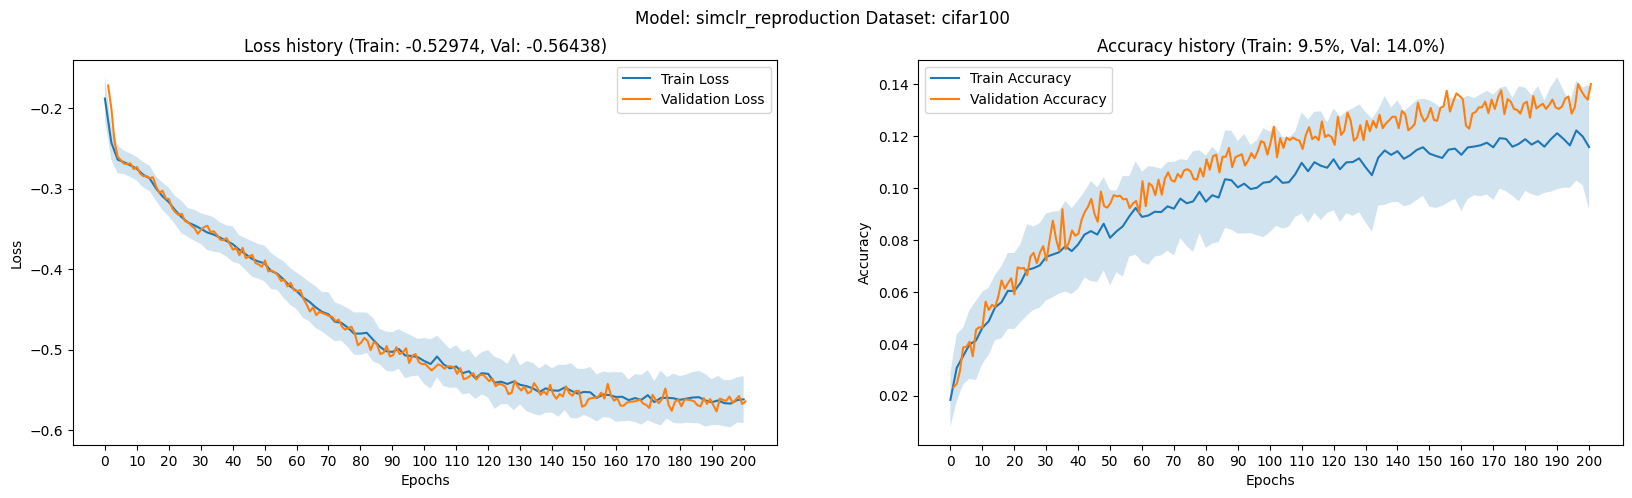

simclr_reproduction cifar10 dict_keys(['hp_metric', 'lr-LARS', 'train_loss', 'online_train_acc', 'online_train_loss', 'epoch', 'val_loss', 'online_val_acc', 'online_val_loss'])


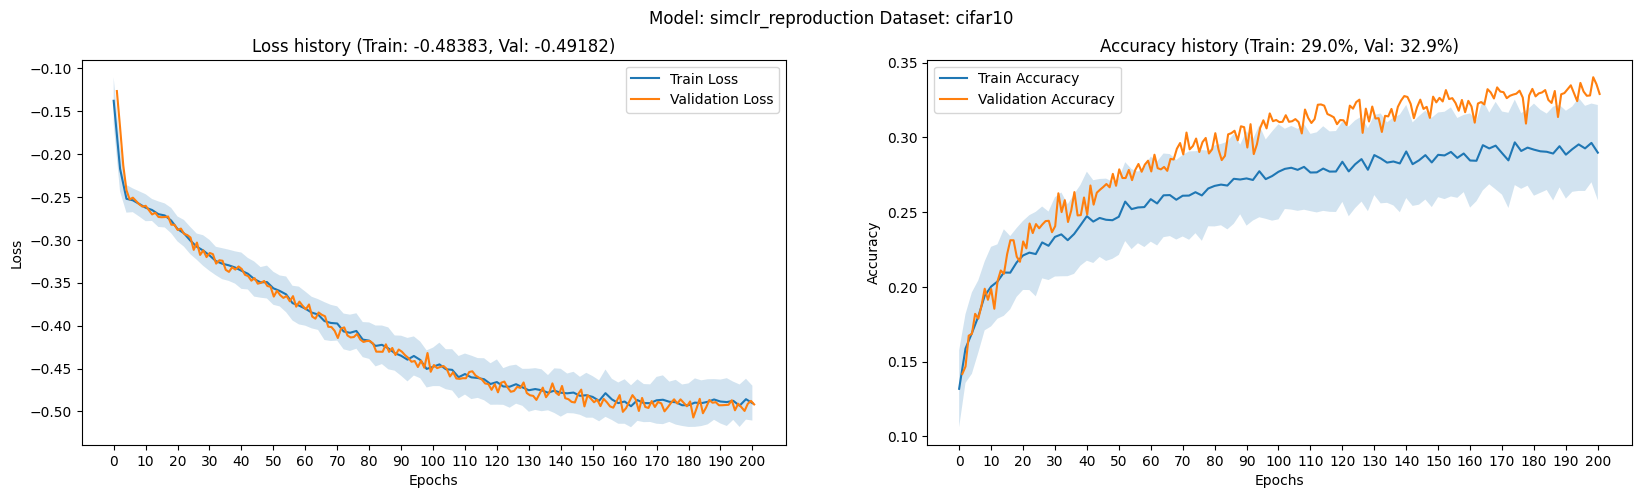

In [3]:
results = plot_all_results(results_path='results_200epochs', results=results)

# Results Summary

Below we can see the reproduction of the Table 1 from page 9 of the research paper:

In [5]:
import pandas as pd
pd.DataFrame(results).pivot_table(
    index=['experiment_name'], 
    columns=['dataset', 'epochs'], 
    values='last_val_acc'
)[[
    ('cifar10',  '50epochs'),
    ('cifar10', '200epochs'),
    ('cifar100',  '50epochs'),
    ('cifar100', '200epochs'),
]]

dataset                   cifar10           cifar100          
epochs                   50epochs 200epochs 50epochs 200epochs
experiment_name                                               
concatenation_sum_kernel    28.00     33.10     9.36     12.30
exponential_kernel          26.76     34.32     9.04     13.02
laplacian_kernel            26.28     33.34     8.38     12.26
simclr_reproduction         27.74     32.90     9.40     14.00
simple_sum_kernel           27.38     33.34    11.78     13.30

The results presented in the table above unfortunately diverge heavily from the results presented in the paper “Contrastive Learning is Spectral Clustering on Similarity Graph”. This can be explained by two major issues that I faced during running the reproduction code. First of all, as the random_search.py algorithm didn’t work, I couldn’t get the optimal hyperparameters to run the code properly and obtain reasonable results. To overcome this I have used the settings described above, which were the most accurate parameters that I could extract from the paper. Due to the lack of an exact documentation, what were the results of the random_search algorithm I had to use some default values that might have affected the final result. Secondly, I was struggling with the setup of the environment which might have as well influenced the results. Following the exact instructions in the Readme file wasn't helpful in setting up the environment and thus I needed to work around it, finding a way for the code to work. These two issues might have affected the results and that the accuracy turned out to be so low.

Similar to the findings in the paper, we can see that the Simple Sum Kernel has achieved the best average results, nevertheless here due to the very low results, it is very difficult to determine the best performance. We can only deduce that with a much better hyperparameter setting, the trend would possibly maintain while reaching much higher accuracies. 
